In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
#Loading the dataset
df_bc = pd.read_csv('./BankChurners.csv')


In [3]:
#First 5 rows in the dataset
df_bc.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
#Deleting last 2 columns
df_bc=df_bc.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1) 


In [5]:
#First 5 rows in the dataset without the columns
df_bc.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
#Checking unique values of Attrition_flag
df_bc['Attrition_Flag'].unique()


array(['Existing Customer', 'Attrited Customer'], dtype=object)

Rectangle(xy=(-0.4, 0), width=0.4, height=8500, angle=0)
Rectangle(xy=(0.6, 0), width=0.4, height=nan, angle=0)
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=nan, angle=0)
Rectangle(xy=(1, 0), width=0.4, height=1627, angle=0)


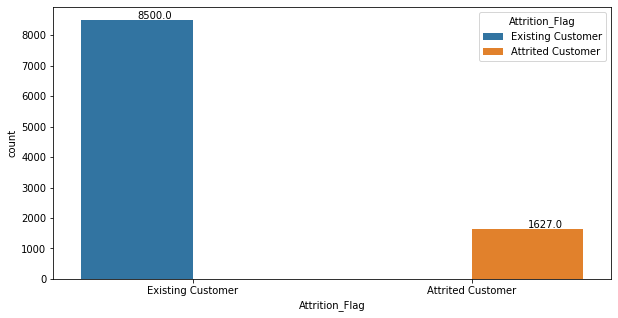

In [7]:
#By attrition
plt.figure(figsize=(10,5))
plot=sns.countplot(x=df_bc.Attrition_Flag,hue=df_bc.Attrition_Flag)

for p in plot.patches:
    print(p)
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()


Rectangle(xy=(-0.4, 0), width=0.4, height=4072, angle=0)
Rectangle(xy=(0.6, 0), width=0.4, height=4428, angle=0)
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=697, angle=0)
Rectangle(xy=(1, 0), width=0.4, height=930, angle=0)


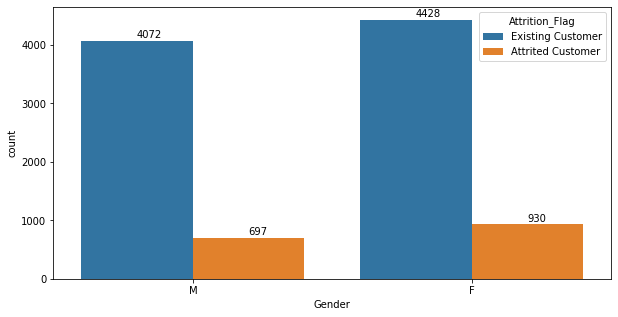

In [8]:
#By gender
plt.figure(figsize=(10,5))
plot=sns.countplot(x=df_bc.Gender,hue=df_bc.Attrition_Flag)

for p in plot.patches:
    print(p)
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()


Rectangle(xy=(-0.4, 0), width=0.4, height=7917, angle=0)
Rectangle(xy=(0.6, 0), width=0.4, height=95, angle=0)
Rectangle(xy=(1.6, 0), width=0.4, height=473, angle=0)
Rectangle(xy=(2.6, 0), width=0.4, height=15, angle=0)
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=1519, angle=0)
Rectangle(xy=(1, 0), width=0.4, height=21, angle=0)
Rectangle(xy=(2, 0), width=0.4, height=82, angle=0)
Rectangle(xy=(3, 0), width=0.4, height=5, angle=0)


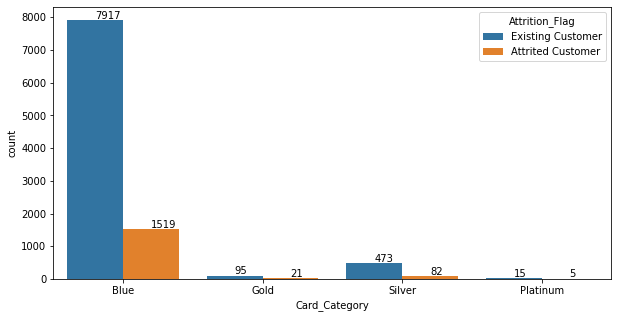

In [9]:
#By card category

plt.figure(figsize=(10,5))
plot=sns.countplot(x=df_bc.Card_Category,hue=df_bc.Attrition_Flag)

for p in plot.patches:
    print(p)
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()


In [10]:
#Prueba jejej
"""
plt.figure(figsize=(10,5))
plot=sns.countplot(x=df_bc.Card_Category,hue=df_bc.CLIENTNUM)

for p in plot.patches:
    print(p)
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))
plt.show()"""

'\nplt.figure(figsize=(10,5))\nplot=sns.countplot(x=df_bc.Card_Category,hue=df_bc.CLIENTNUM)\n\nfor p in plot.patches:\n    print(p)\n    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))\nplt.show()'

In [11]:
"""
#Changing Attrition_flag to numeric
df_bc.loc[df_bc['Attrition_Flag'] == 'Existing Customer', 'Attrition_Flag'] = 0
df_bc.loc[df_bc['Attrition_Flag'] == 'Attrited Customer', 'Attrition_Flag'] = 1
df_bc.Attrition_Flag = df_bc.Attrition_Flag.astype(int)

df_bc.head()"""

"\n#Changing Attrition_flag to numeric\ndf_bc.loc[df_bc['Attrition_Flag'] == 'Existing Customer', 'Attrition_Flag'] = 0\ndf_bc.loc[df_bc['Attrition_Flag'] == 'Attrited Customer', 'Attrition_Flag'] = 1\ndf_bc.Attrition_Flag = df_bc.Attrition_Flag.astype(int)\n\ndf_bc.head()"

## Normalize the data

In [12]:
#One hot encoding for Categorical variables
df_bc_encoded = pd.get_dummies(df_bc)

#Dropping client ID
df_bc_encoded_norm=df_bc_encoded.drop(['CLIENTNUM'], axis = 1) 

df_bc_encoded_norm.head()


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,1,0,0,0,1,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,0,0,1,0,1,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,1,0,0,1,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,1,0,1,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,1,0,0,0,1,0,0,0


# K-means implementation

In [13]:
#We need numeric variables for the clusting, so i see the info
df_bc_encoded_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_Age                      10127 non-null  int64  
 1   Dependent_count                   10127 non-null  int64  
 2   Months_on_book                    10127 non-null  int64  
 3   Total_Relationship_Count          10127 non-null  int64  
 4   Months_Inactive_12_mon            10127 non-null  int64  
 5   Contacts_Count_12_mon             10127 non-null  int64  
 6   Credit_Limit                      10127 non-null  float64
 7   Total_Revolving_Bal               10127 non-null  int64  
 8   Avg_Open_To_Buy                   10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1              10127 non-null  float64
 10  Total_Trans_Amt                   10127 non-null  int64  
 11  Total_Trans_Ct                    10127 non-null  int64  
 12  Tota

## Optimal cluster search
Calculating similarity between the clients

In [14]:
#Implement codo de jambu to determinate the optimal quantity of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(df_bc_encoded_norm) #Apply Kmeans to the dataset
    wcss.append(kmeans.inertia_)

Graphing the results of WCSS to get the codo de jambu

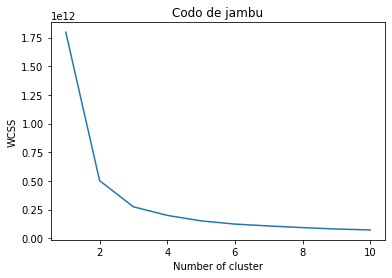

In [15]:
plt.plot(range(1,11), wcss)
plt.title("Codo de jambu")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")  #WCSS is a indicator of how similar are the clients inside the clusters
plt.show()

## Apply the method to the clients data

In [16]:
kmeans = KMeans(3, max_iter = 300) #Create the model
kmeans.fit(df_bc_encoded_norm) #Apply the model

KMeans(n_clusters=3)

In [17]:
KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300,
       tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, 
       copy_x=True, n_jobs='none', algorithm='auto')

KMeans(n_clusters=3, n_jobs='none')

In [18]:
#The number of clusters created
clusters = kmeans.predict(df_bc_encoded_norm)
clusters

array([2, 0, 0, ..., 0, 0, 2], dtype=int32)

## Adding the clusters classification to the original dataset

In [19]:
df_bc["Kmeans_Clusters"] = kmeans.labels_
df_bc

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Kmeans_Clusters
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,2
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0


In [102]:

user = df_bc.loc[(df_bc['CLIENTNUM']==714337233)]
user_id = user['Kmeans_Clusters']

print(user_id)

10126    2
Name: Kmeans_Clusters, dtype: int64


## Visualizing the formed clusters PCA

Analysis of components to visualize the data in 2 dimentions

In [20]:
pca = PCA(n_components = 2)
pca_clients = pca.fit_transform(df_bc_encoded_norm)
pca_clients_df = pd.DataFrame(data = pca_clients, columns = ["Component_1", "Component_2"])
pca_names_clients = pd.concat([pca_clients_df, df_bc[["Kmeans_Clusters"]]], axis=1)

pca_names_clients

,Component_1,Component_2,Kmeans_Clusters
0,5850.149900,-3553.806358,2
1,-469.106559,-3101.456657,0
2,-6664.303458,-2230.729542,0
3,-8625.035903,-2787.043971,0
4,-4882.065189,-3388.096623,0
...,...,...,...
10122,-6494.584782,11411.705488,0
10123,-6665.728507,4710.418008,0
10124,-3449.249774,6026.927591,0
10125,-3720.885976,4142.255064,0


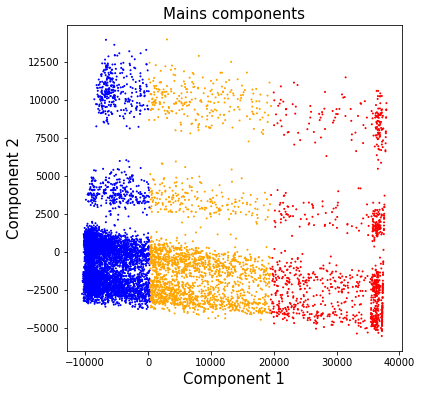

In [21]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Component 1", fontsize = 15)
ax.set_ylabel("Component 2", fontsize = 15)
ax.set_title("Mains components", fontsize = 15)

color_theme = np.array(["blue","red", "orange", "yellow", "black", "purple", "green", "gray","brown","cyan", "olive", "pink", "bisque", "lime", "teal"])
ax.scatter(x = pca_names_clients.Component_1, y = pca_names_clients.Component_2, c = color_theme[pca_names_clients.Kmeans_Clusters], s = 1)

plt.show()

   Feature1  Feature2  Feature3  Cluster
0  0.011002  0.619485  0.136639      0.0
1  0.660650  0.841772  0.627712      0.0
2  0.489066  0.621732  0.916887      1.0
3  0.447171  0.445120  0.958793      0.0
4  0.904470  0.546849  0.478162      1.0
5  0.745052  0.928357  0.749083      0.0
6  0.742130  0.255706  0.021045      1.0
7  0.263451  0.686333  0.324682      1.0
8  0.749616  0.320403  0.575349      0.0
9  0.463303  0.278388  0.304784      0.0


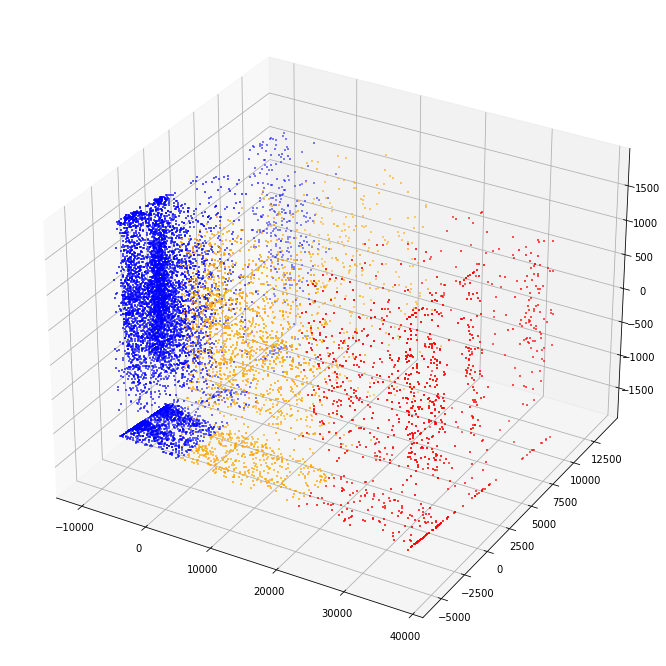

In [28]:
from mpl_toolkits.mplot3d import Axes3D

v = np.random.rand(10,4)
v[:,3] = np.random.randint(0,2,size=10)
df = pd.DataFrame(v, columns=['Feature1', 'Feature2','Feature3',"Cluster"])
print (df)

pca = PCA(n_components = 3)
pca_clients = pca.fit_transform(df_bc_encoded_norm)
pca_clients_df = pd.DataFrame(data = pca_clients, columns = ["Component_1", "Component_2", "Component_3"])
pca_names_clients = pd.concat([pca_clients_df, df_bc[["Kmeans_Clusters"]]], axis=1)

pca_names_clients

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
x = np.array(pca_names_clients['Component_1'])
y = np.array(pca_names_clients['Component_2'])
z = np.array(pca_names_clients['Component_3'])

ax.scatter(x,y,z, marker="s", c=color_theme[pca_names_clients.Kmeans_Clusters], s=1, cmap="RdBu")

plt.show()


In [23]:
pca_names_clients

,Component_1,Component_2,Component_3,Kmeans_Clusters
0,5850.149900,-3553.806358,-395.440517,2
1,-469.106559,-3101.456657,-299.352223,0
2,-6664.303458,-2230.729542,-1377.258859,0
3,-8625.035903,-2787.043971,1717.877475,0
4,-4882.065189,-3388.096623,-1352.135977,0
...,...,...,...,...
10122,-6494.584782,11411.705488,596.635890,0
10123,-6665.728507,4710.418008,1151.242395,0
10124,-3449.249774,6026.927591,-1554.624905,0
10125,-3720.885976,4142.255064,-1514.090544,0


## Interpretation of Cluster

In [24]:
#Use the original dataset csv to copy and drop the clientnum
df_analysis = df_bc
df_analysis=df_analysis.drop(['CLIENTNUM'], axis = 1) 
df_analysis

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Kmeans_Clusters
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,2
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0


/home/alberto/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


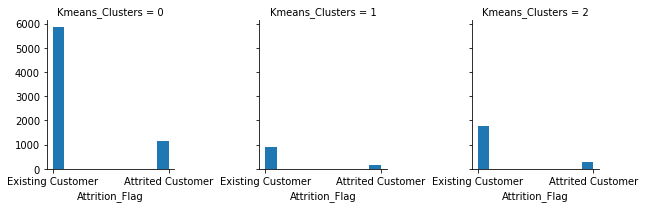

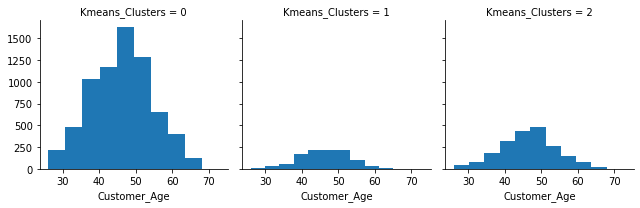

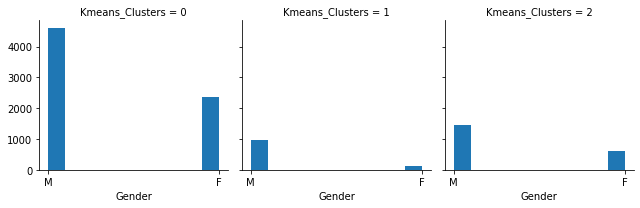

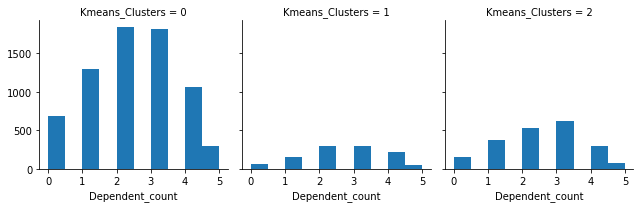

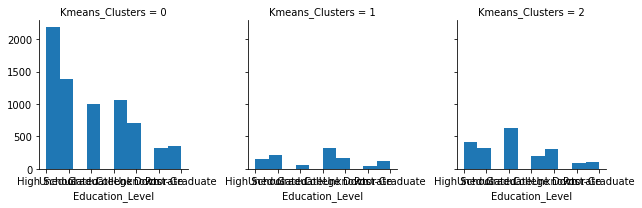

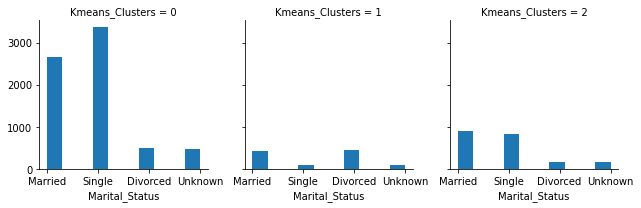

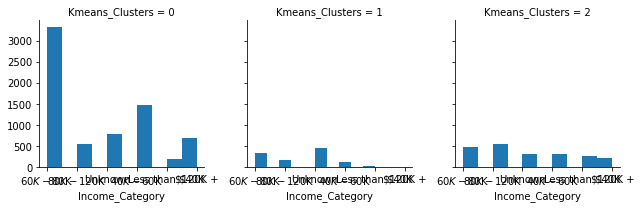

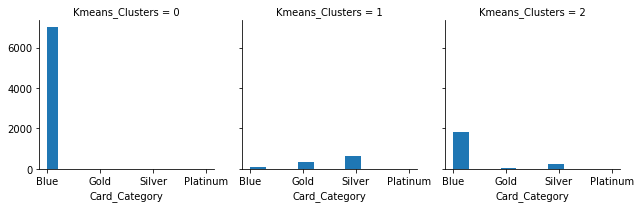

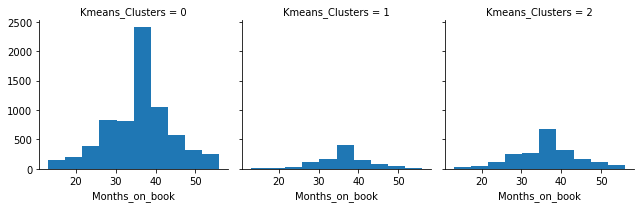

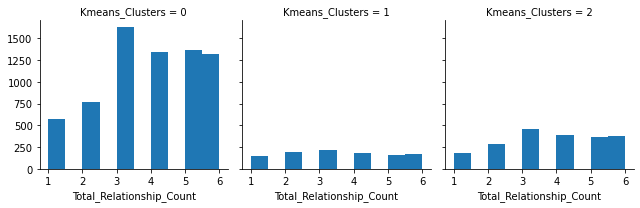

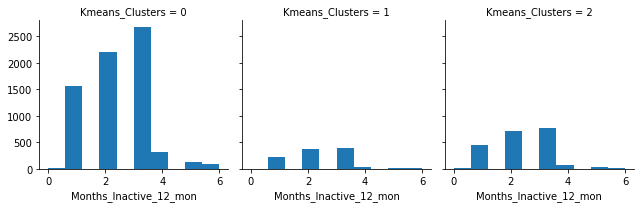

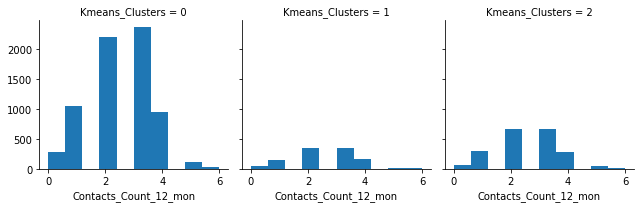

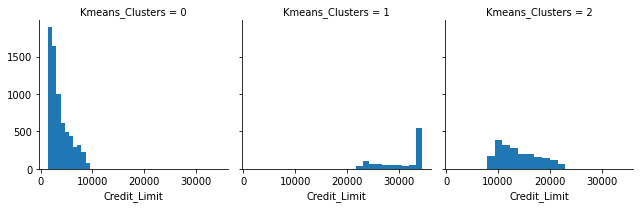

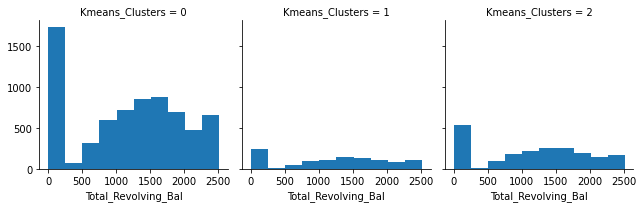

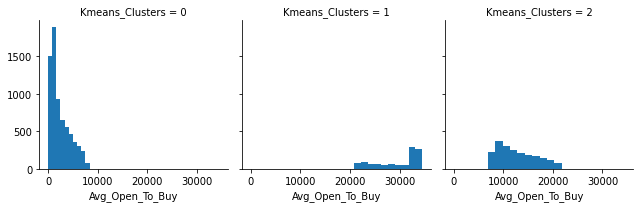

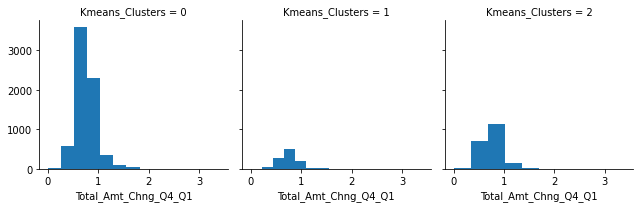

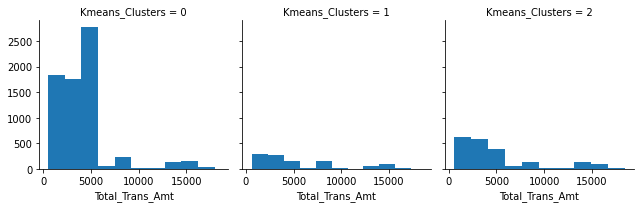

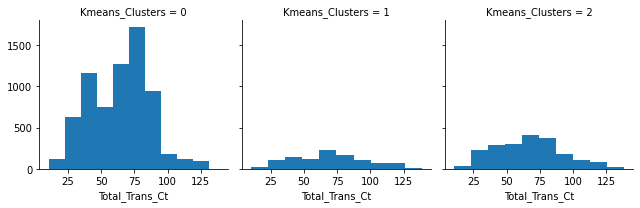

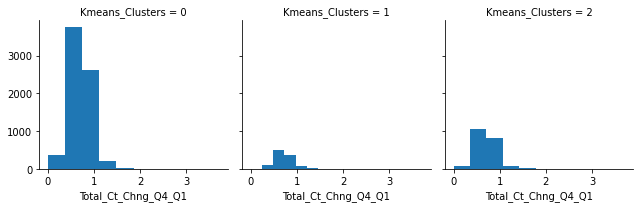

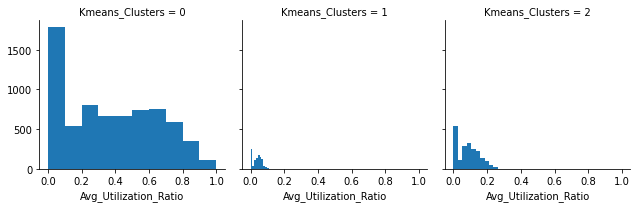

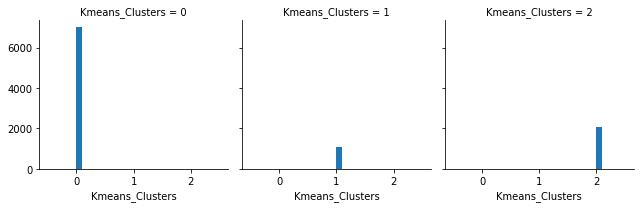

In [46]:
for c in df_analysis:
    grid= sns.FacetGrid(df_analysis, col='Kmeans_Clusters')
    grid.map(plt.hist, c)
    

In [34]:
df_analysis.groupby('Kmeans_Clusters').mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Kmeans_Clusters,,,,,,,,,,,,,,
0,46.317851,2.306274,35.890239,3.871945,2.353866,2.444762,3666.651293,1165.883664,2500.767629,0.758973,4053.767758,63.859797,0.711994,0.366545
1,46.352612,2.572761,35.986007,3.503731,2.316231,2.491604,30857.741604,1202.838619,29654.902985,0.760763,5653.915112,69.114739,0.709119,0.039675
2,46.339650,2.363946,36.028183,3.771623,2.310982,2.472303,13936.218173,1131.529155,12804.689018,0.762802,4944.106900,66.037901,0.714615,0.085812


In [27]:
df_analysis

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Kmeans_Clusters
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,2
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0


Rectangle(xy=(-0.4, 0), width=0.2, height=6991, angle=0)
Rectangle(xy=(0.6, 0), width=0.2, height=644, angle=0)
Rectangle(xy=(1.6, 0), width=0.2, height=1801, angle=0)
Rectangle(xy=(-0.2, 0), width=0.2, height=3, angle=0)
Rectangle(xy=(0.8, 0), width=0.2, height=88, angle=0)
Rectangle(xy=(1.8, 0), width=0.2, height=25, angle=0)
Rectangle(xy=(2.77556e-17, 0), width=0.2, height=3, angle=0)
Rectangle(xy=(1, 0), width=0.2, height=324, angle=0)
Rectangle(xy=(2, 0), width=0.2, height=228, angle=0)
Rectangle(xy=(0.2, 0), width=0.2, height=nan, angle=0)
Rectangle(xy=(1.2, 0), width=0.2, height=16, angle=0)
Rectangle(xy=(2.2, 0), width=0.2, height=4, angle=0)


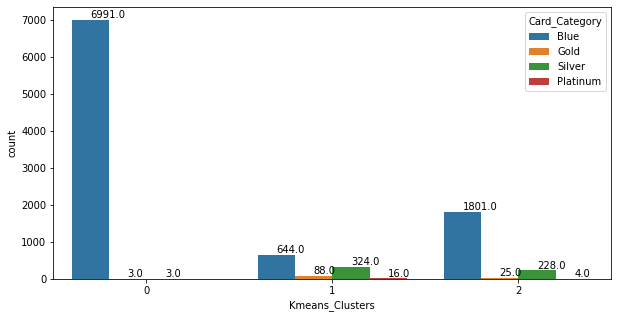

In [53]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=df_bc.Kmeans_Clusters,hue=df_bc.Card_Category)

for p in plot.patches:
    print(p)
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))

plt.show()

Rectangle(xy=(-0.4, 0), width=0.133333, height=577, angle=0)
Rectangle(xy=(0.6, 0), width=0.133333, height=147, angle=0)
Rectangle(xy=(1.6, 0), width=0.133333, height=186, angle=0)
Rectangle(xy=(-0.266667, 0), width=0.133333, height=769, angle=0)
Rectangle(xy=(0.733333, 0), width=0.133333, height=191, angle=0)
Rectangle(xy=(1.73333, 0), width=0.133333, height=283, angle=0)
Rectangle(xy=(-0.133333, 0), width=0.133333, height=1625, angle=0)
Rectangle(xy=(0.866667, 0), width=0.133333, height=218, angle=0)
Rectangle(xy=(1.86667, 0), width=0.133333, height=462, angle=0)
Rectangle(xy=(9.71445e-17, 0), width=0.133333, height=1346, angle=0)
Rectangle(xy=(1, 0), width=0.133333, height=181, angle=0)
Rectangle(xy=(2, 0), width=0.133333, height=385, angle=0)
Rectangle(xy=(0.133333, 0), width=0.133333, height=1362, angle=0)
Rectangle(xy=(1.13333, 0), width=0.133333, height=161, angle=0)
Rectangle(xy=(2.13333, 0), width=0.133333, height=368, angle=0)
Rectangle(xy=(0.266667, 0), width=0.133333, heigh

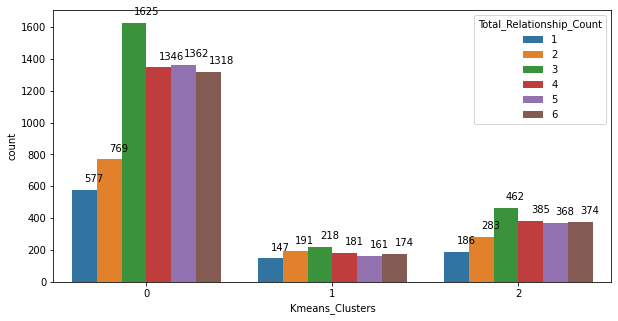

In [60]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=df_bc.Kmeans_Clusters,hue=df_bc.Total_Relationship_Count)

for p in plot.patches:
    print(p)
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))

plt.show()

Rectangle(xy=(-0.4, 0), width=0.4, height=5839, angle=0)
Rectangle(xy=(0.6, 0), width=0.4, height=900, angle=0)
Rectangle(xy=(1.6, 0), width=0.4, height=1761, angle=0)
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=1158, angle=0)
Rectangle(xy=(1, 0), width=0.4, height=172, angle=0)
Rectangle(xy=(2, 0), width=0.4, height=297, angle=0)


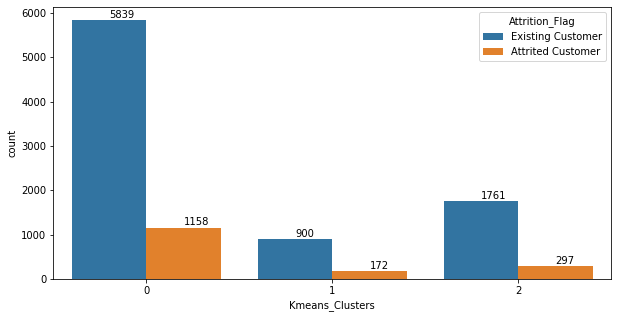

In [61]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=df_bc.Kmeans_Clusters,hue=df_bc.Attrition_Flag)

for p in plot.patches:
    print(p)
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))

plt.show()

Rectangle(xy=(-0.4, 0), width=0.114286, height=19, angle=0)
Rectangle(xy=(0.6, 0), width=0.114286, height=1, angle=0)
Rectangle(xy=(1.6, 0), width=0.114286, height=9, angle=0)
Rectangle(xy=(-0.285714, 0), width=0.114286, height=1564, angle=0)
Rectangle(xy=(0.714286, 0), width=0.114286, height=227, angle=0)
Rectangle(xy=(1.71429, 0), width=0.114286, height=442, angle=0)
Rectangle(xy=(-0.171429, 0), width=0.114286, height=2200, angle=0)
Rectangle(xy=(0.828571, 0), width=0.114286, height=377, angle=0)
Rectangle(xy=(1.82857, 0), width=0.114286, height=705, angle=0)
Rectangle(xy=(-0.0571429, 0), width=0.114286, height=2666, angle=0)
Rectangle(xy=(0.942857, 0), width=0.114286, height=400, angle=0)
Rectangle(xy=(1.94286, 0), width=0.114286, height=780, angle=0)
Rectangle(xy=(0.0571429, 0), width=0.114286, height=325, angle=0)
Rectangle(xy=(1.05714, 0), width=0.114286, height=43, angle=0)
Rectangle(xy=(2.05714, 0), width=0.114286, height=67, angle=0)
Rectangle(xy=(0.171429, 0), width=0.114286,

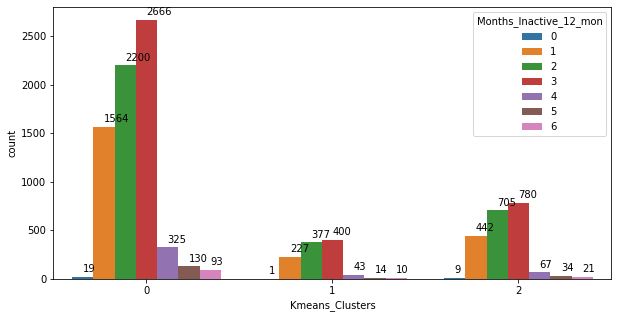

In [62]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=df_bc.Kmeans_Clusters,hue=df_bc.Months_Inactive_12_mon)

for p in plot.patches:
    print(p)
    plot.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()+50))

plt.show()